# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some descriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [6]:
# Your code here
ds = pd.read_csv('PS_20174392719_1491204439457_log.csv')
ds.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# taking a sample of the dataframe
fraud = ds.sample(n=100000, random_state=31)

In [8]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4081471,301,PAYMENT,13431.33,C1504665643,0.00,0.0,M1655809126,0.00,0.00,0,0
274307,15,PAYMENT,26191.71,C1403328074,867007.41,840815.7,M1098506221,0.00,0.00,0,0
1958884,178,PAYMENT,20068.03,C1778588551,0.00,0.0,M1750942799,0.00,0.00,0,0
1584400,155,CASH_OUT,157503.98,C802006140,0.00,0.0,C233486185,3217624.56,3375128.55,0,0
1529632,153,CASH_IN,206047.50,C2012084294,15358.00,221405.5,C368873736,84194.06,0.00,0,0


In [9]:
fraud.shape

(100000, 11)

In [10]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.00000,100000.0
mean,243.814170,1.814268e+05,8.161309e+05,8.376696e+05,1.088367e+06,1.215461e+06,0.00120,0.0
std,142.445923,6.254963e+05,2.847627e+06,2.882636e+06,3.353355e+06,3.667102e+06,0.03462,0.0
min,1.000000,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
25%,156.000000,1.334960e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
50%,240.000000,7.389501e+04,1.440900e+04,0.000000e+00,1.268062e+05,2.098144e+05,0.00000,0.0
75%,334.000000,2.095547e+05,1.064140e+05,1.439088e+05,9.386645e+05,1.107863e+06,0.00000,0.0
max,741.000000,4.196371e+07,4.567455e+07,3.567455e+07,3.025609e+08,3.022754e+08,1.00000,0.0


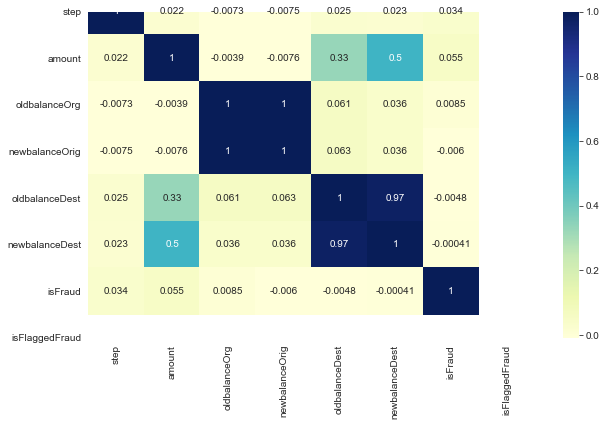

In [11]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(fraud.corr(), annot = True, cmap = 'YlGnBu')

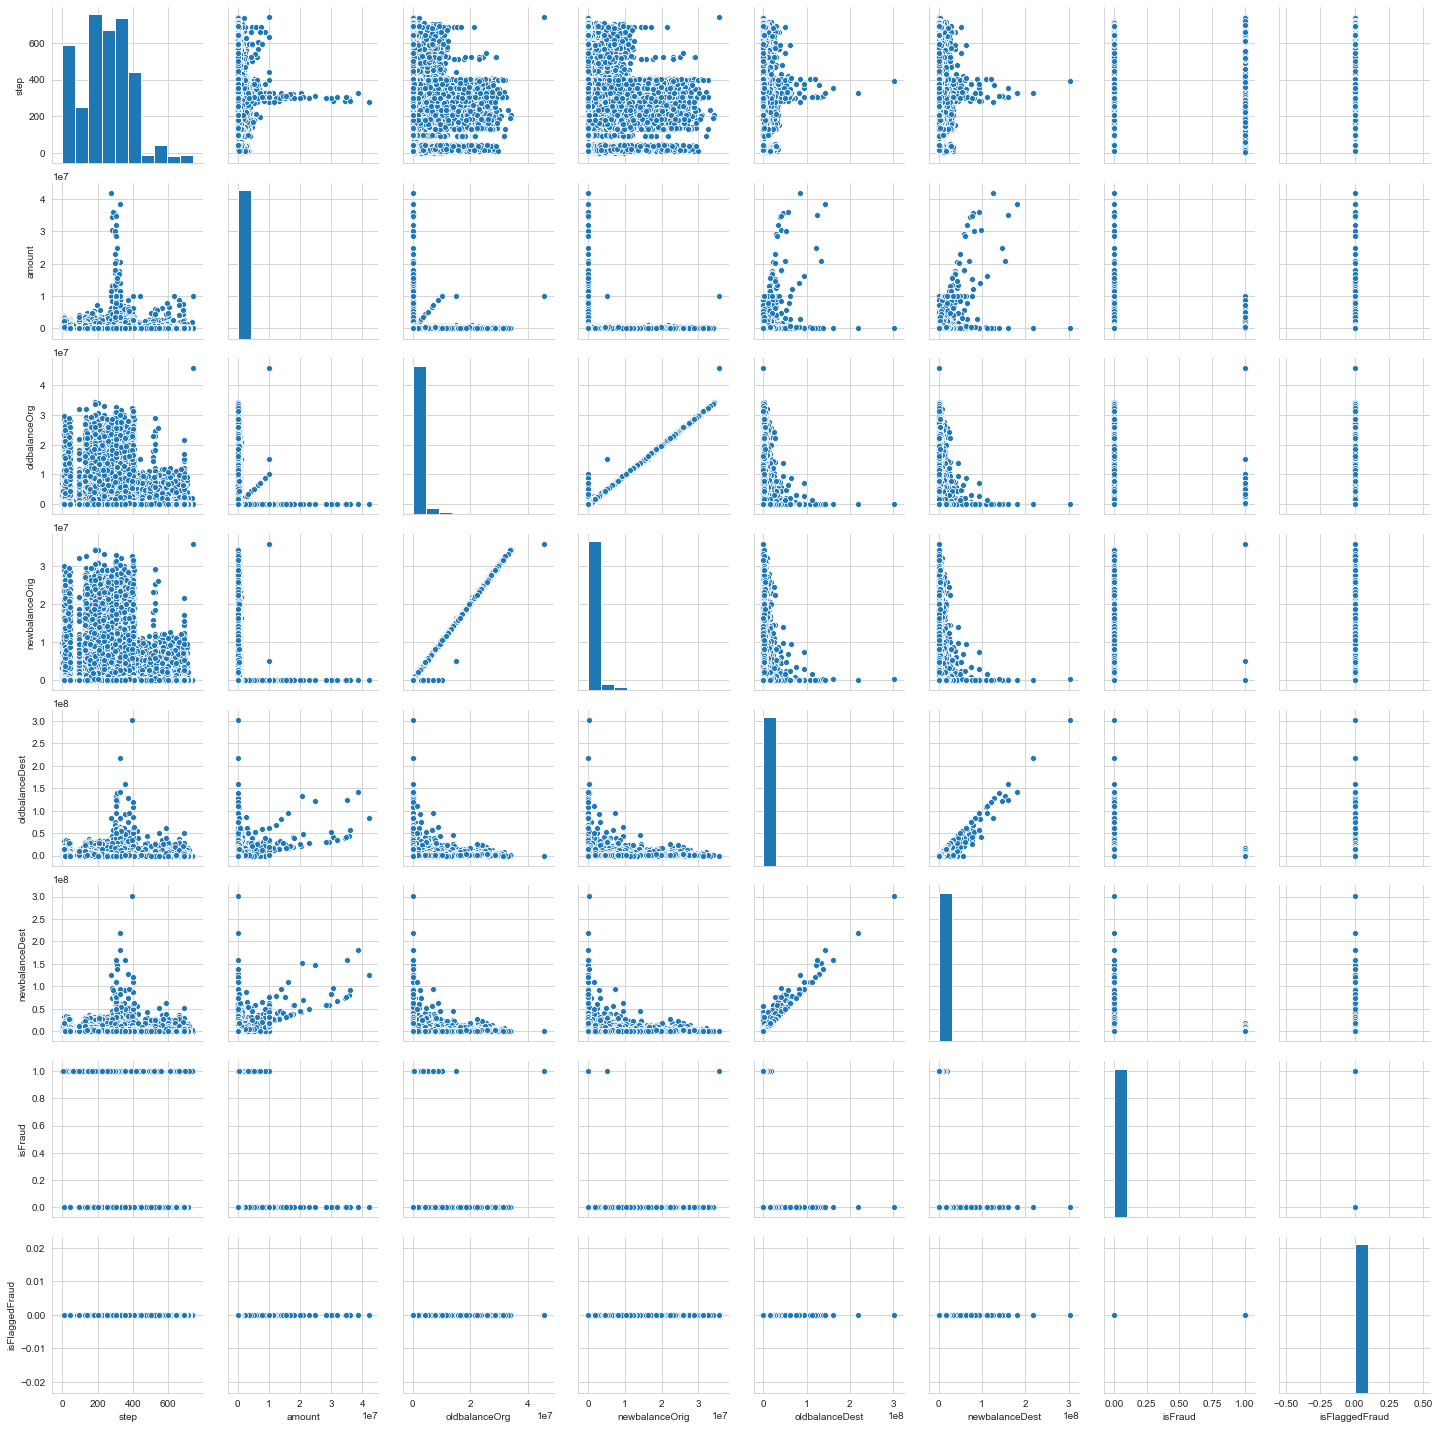

In [25]:
sns.pairplot(fraud)

In [26]:
'''The most import features to determine the outcome(isfraud) would be old balance, new balance 
and ammount.
'''

'The most import features to determine the outcome(isfraud) would be old balance, new balance \nand ammount.\n'

### What is the distribution of the outcome? 

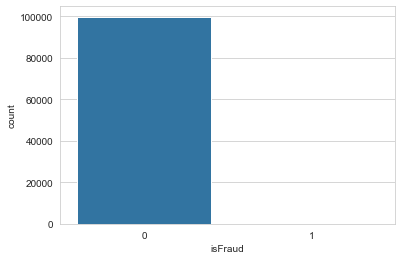

In [27]:
# Your response here
# checking distribution with histogram
sns.countplot(fraud.isFraud)

In [12]:
# checking distribution numbers
fraud.isFraud.value_counts()

0    99880
1      120
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [13]:
# Your code here
fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
'''As step is an integer and we do not know dates I think this is not going to be usefull in the way
it is available.'''

'As step is an integer and we do not know dates I think this is not going to be usefull in the way\nit is available.'

In [16]:
fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
# Droping columns that are non numerical and not relevant to outcome
fraud.drop(['step', 'type', 'nameOrig','nameDest','oldbalanceDest', 'newbalanceOrig'], axis=1, inplace=True)

In [18]:
# normalizing data
y = fraud['isFraud'].values
X = fraud.drop('isFraud', axis = 1).values


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2)

### Run a logisitc regression classifier and evaluate its accuracy.

In [21]:
# Your code here
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train) 
acc = lr.score(X_test,y_test)*100 # evaluation

print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")

Logistic Regression Test Accuracy 99.88%


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Now pick a model of your choice and evaluate its accuracy.

In [22]:
# Your code here
# Using KNN (unsupervised learning)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test)*100
print(f"3 neighbors KNN Accuracy Score: {round(acc,2)}%")


3 neighbors KNN Accuracy Score: 99.87%


In [24]:
# making a pipeline with 3 models (supervised learning)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

for k in range(1,5):
    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(k), LinearRegression())
    model = poly_model.fit(X_norm, y)

    print(k, poly_model.score(X_test, y_test)*100)

1 0.22674587565799653
2 2.8202773562616694
3 4.377291199917622
4 5.116893041367321


### Which model worked better and how do you know?

In [44]:
# Your response here
'''The nearest neighbor model worked better because it had 99% of accuracy, whereas all the 
other model I've used had very low performances.'''

"The nearest neighbor model worked better because it had 99% of accuracy, whereas all the \nother model I've used had very low performances."